In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

In [42]:
data = pd.read_csv('assets/NIFTY 50 - Daily data.csv')
data.head()

,date,open,high,low,close,volume
0,2015-01-01 00:00:00+05:30,8272.79,8294.70,8248.75,8284.00,0
1,2015-01-02 00:00:00+05:30,8288.70,8410.60,8288.70,8395.45,0
2,2015-01-05 00:00:00+05:30,8407.95,8445.60,8363.90,8378.40,0
3,2015-01-06 00:00:00+05:30,8325.29,8327.85,8111.35,8127.35,0
4,2015-01-07 00:00:00+05:30,8118.65,8151.20,8065.45,8102.10,0


In [43]:
data['date'] = pd.to_datetime(data['date'])
data.sort_values('date', ascending=True, inplace=True)
data['date'].min(), data['date'].max()

(Timestamp('2015-01-01 00:00:00+0530', tz='pytz.FixedOffset(330)'),
 Timestamp('2022-02-18 00:00:00+0530', tz='pytz.FixedOffset(330)'))

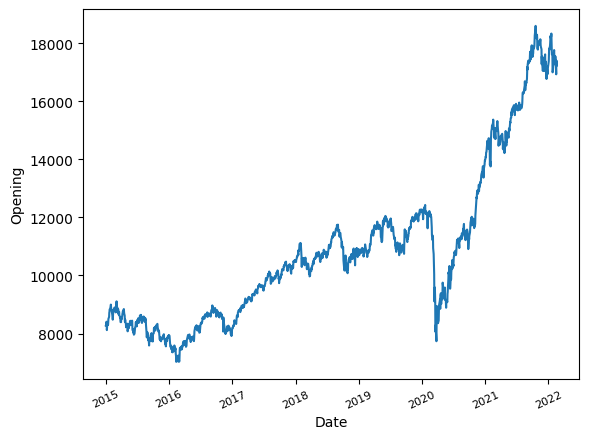

In [46]:
plt.xlabel('Date')
plt.ylabel('Opening')
plt.plot(data['date'], data['open'])
plt.xticks(fontsize=8, rotation=25)
plt.show()

In [47]:
rolling_mean_5 = data['open'].rolling(window=5).mean()
rolling_mean_10 = data['open'].rolling(window=10).mean()
rolling_mean_15 = data['open'].rolling(window=15).mean()
rolling_mean_20 = data['open'].rolling(window=20).mean()

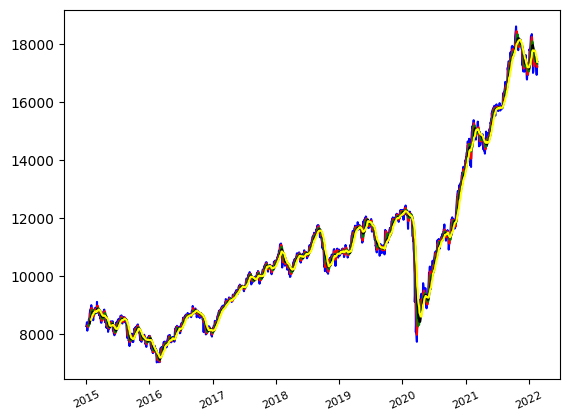

In [48]:
plt.plot(data['date'],data['open'], color='blue', label='Orig')
plt.plot(data['date'],rolling_mean_5, color='red', label='Rolling5Mean')
plt.plot(data['date'],rolling_mean_10, color='green', label='Rolling10Mean')
plt.plot(data['date'],rolling_mean_15, color='black', label='Rolling15Mean')
plt.plot(data['date'],rolling_mean_20, color='yellow', label='Rolling5Mean')
plt.xticks(fontsize=8, rotation=25)
plt.show()

In [50]:
data['moving_avg_5'] = rolling_mean_5
data['moving_avg_10'] = rolling_mean_10
data['moving_avg_15'] = rolling_mean_15
data['moving_avg_20'] = rolling_mean_20
data.dropna(inplace=True)
data.head()

,date,open,high,low,close,volume,moving_avg_5,moving_avg_10,moving_avg_15,moving_avg_20
19,2015-01-29 00:00:00+05:30,8901.50,8966.65,8861.25,8952.35,0,8849.88,8702.273,8562.955333,8492.8855
20,2015-01-30 00:00:00+05:30,8996.60,8996.60,8775.10,8808.90,0,8900.03,8759.483,8616.635333,8529.0760
21,2015-02-02 00:00:00+05:30,8802.50,8840.79,8751.10,8797.40,0,8894.94,8789.329,8651.105333,8554.7660
22,2015-02-03 00:00:00+05:30,8823.15,8837.29,8726.65,8756.54,0,8885.30,8816.640,8686.558667,8575.5260
23,2015-02-04 00:00:00+05:30,8789.15,8792.85,8704.40,8723.70,0,8862.58,8838.045,8716.092000,8598.7190


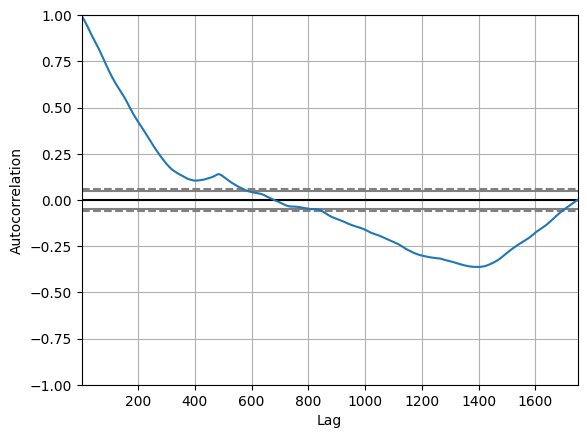

In [52]:
autocorrelation_plot(data['open'])
plt.show()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


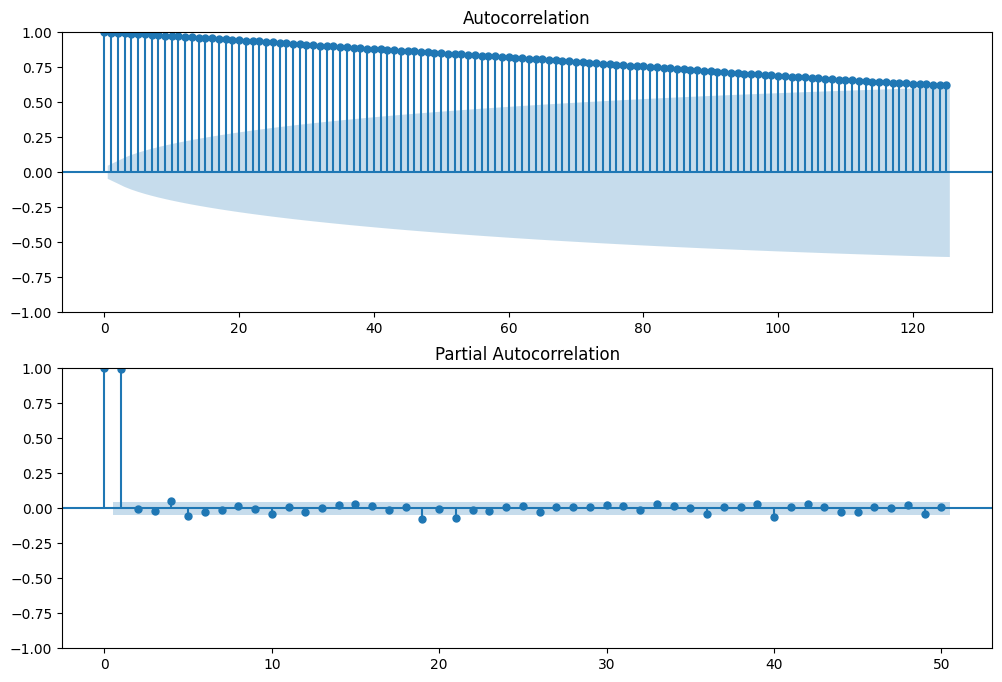

In [74]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['open'].dropna(),lags=125,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['open'].dropna(),lags=50,ax=ax2)

In [62]:
model = ARIMA(data.open, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   open   No. Observations:                 1749
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -10862.379
Date:                Wed, 05 Oct 2022   AIC                          21728.757
Time:                        09:53:03   BIC                          21739.690
Sample:                             0   HQIC                         21732.799
                               - 1749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0306      0.014     -2.256      0.024      -0.057      -0.004
sigma2      1.463e+04    211.089     69.296      0.000    1.42e+04     1.5e+04
Ljung-Box (L1) (Q):                   0.00   Jarque-

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [64]:
model = ARIMA(data.open, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   open   No. Observations:                 1749
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10855.763
Date:                Wed, 05 Oct 2022   AIC                          21723.525
Time:                        09:53:18   BIC                          21756.323
Sample:                             0   HQIC                         21735.650
                               - 1749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0280      0.014     -1.980      0.048      -0.056      -0.000
ar.L2          0.0188      0.016      1.210      0.226      -0.012       0.049
ar.L3          0.0159      0.016      0.964      0.3

_4th and 5th lag are significant_

In [69]:
X = data['open'].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
traindf, testdf = data[0:size], data[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

120.14306632048317


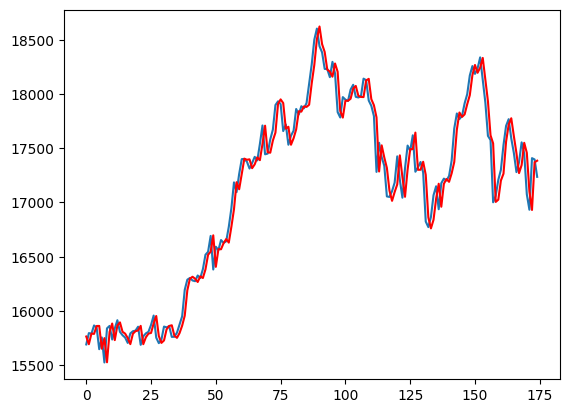

In [70]:
mae = mean_absolute_error(test, predictions)
print(mae)

plt.plot(test)
plt.plot(predictions, color = 'red')
plt.show()

In [72]:
mae_5 = mean_absolute_error(testdf['open'], testdf['moving_avg_5'])
mae_10 = mean_absolute_error(testdf['open'], testdf['moving_avg_10'])
mae_15 = mean_absolute_error(testdf['open'], testdf['moving_avg_15'])
mae_20 = mean_absolute_error(testdf['open'], testdf['moving_avg_20'])

In [73]:
mae_5, mae_10, mae_15, mae_20

(132.6958857142858, 196.14525714285713, 246.28685714285712, 292.34265714285715)